#Практическая работа №7:Кластерный анализ. Метод поиска сгущений

Выполнил студент гр.9372 Александр Аксёнов, вариант 2

## Цель работы

Освоение основных понятий и некоторых методо кластерного анализа, в частности, метода поиска сгущений.

##Основные теоретические положения

FOREL - алгоритм кластеризации, основанный на идее объединения в один кластер объектов в областях их наибольшего сгущения.

Цель кластеризаци - разбить выборку на такое (заранее неизвестное) число групп, чтобы сумма расстояния от объектов кластеров до центров кластеров была минимальной по всем кластерам. То есть наша задача - выделить группу максимально близких друг к другу объектов, которые в силу гипотезы схожести будут образовывать наши кластеры.

## Порядок выполнения работы

1.   Нормализовать множество точек, отобразить полученное множество.
2.   Реализовать алгоритм поиска сгущений, отобразить полученные кластеры, выделить каждый кластер разным цветом, отметить центроиды.
3. Проверить чувствительность метода к погрешностям. Сделать выводы.
4. Сравнить с методами из практической работы №6. Сделать выводы.



## Выполнение работы

Первым делом нормализуем наши данные, полученные результаты отображены ниже.

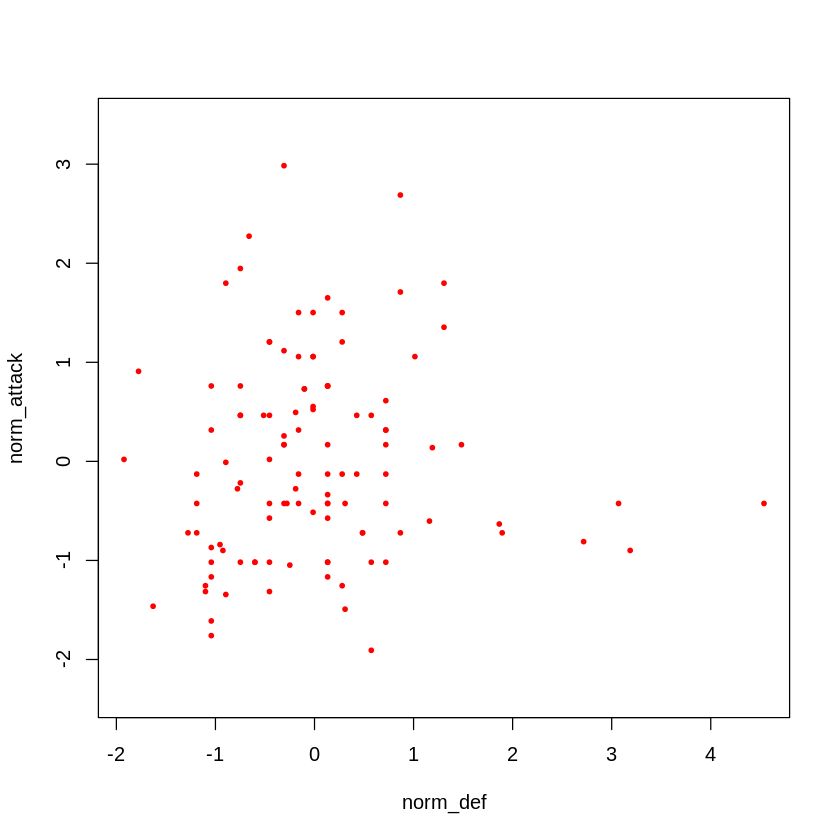

In [2]:
pokemon_data <- read.csv('sample_data/pokemons_sample.csv', sep=";")

def <- pokemon_data$defense

attack <- pokemon_data$special_attack

some_list <- split(pokemon_data, seq(nrow(pokemon_data)))


norm_def = (def - mean(def)) / sd(def)
norm_attack = (attack - mean(attack)) / sd(attack)

plot(norm_def, norm_attack, col='red', pch=19, asp=1, cex=0.5)

Теперь реализуем алгоритм поиска сгущений. Реализация алгоритма и результат работы приведен в коде снизу. 

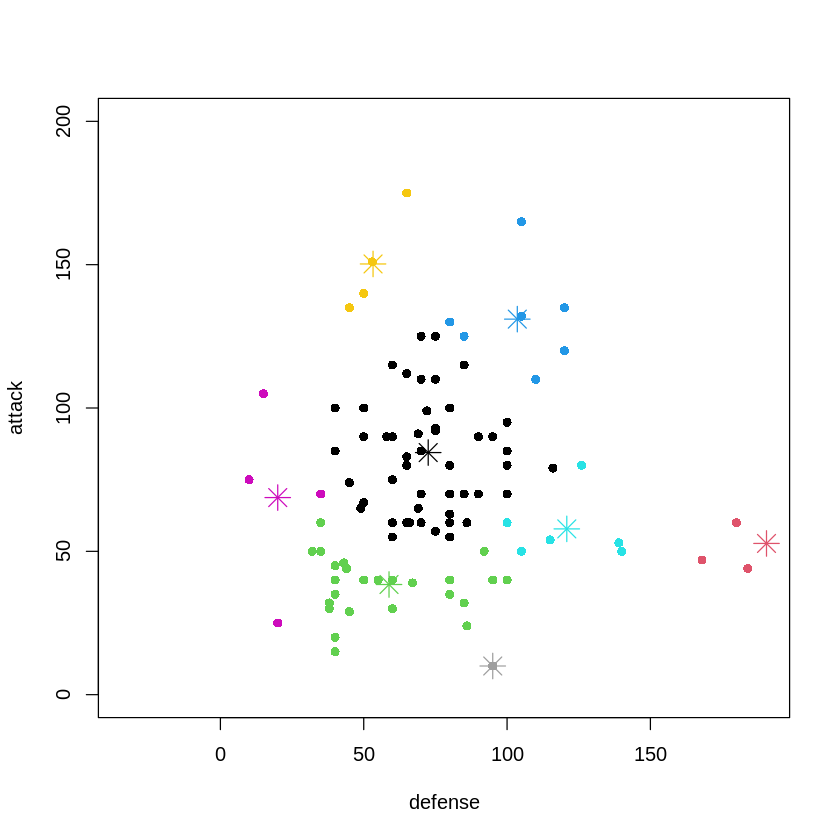

In [3]:

city_metrik <- function(c1, c2)
{
  metrik <- abs((c1[[1]] - c2[[1]][1])) + abs((c1[[2]] - c2[[1]][2])) 
  return(metrik)
}



forel <- function(df, r){
  clusters <- list()
  centroids <- list()

  while (TRUE)
  {
    x0 <- list(c(0,0))
    x_temp <- df[[sample(1:length(df), 1)]]
    x0[[1]][1] = x_temp[[1]]
    x0[[1]][2] = x_temp[[2]]
    while (TRUE)
    {
      summary <- list(c(0,0))
      c <- list()
      for (x in df)
      {
        if (city_metrik(x, x0) <= r)
        {
          c <- append(c, list(x))
          summary[[1]][1] <- summary[[1]][1] + x[[1]]
          summary[[1]][2] <- summary[[1]][2] + x[[2]]
          
        }
      }
      if (length(c) == 0)
      {
        x_cup <- list(c(0,0))
      }
      else
      {
        x_cup <- list(c(0,0))
        x_cup[[1]][1] <- summary[[1]][1] / length(c)
        x_cup[[1]][2] <- summary[[1]][2] / length(c)
      }
      
      if ((x0[[1]][1] == x_cup[[1]][1]) & (x0[[1]][2] == x_cup[[1]][2]))
      {
        break
      }
      else
      {
        x0 <- x_cup
      }
    }
    
    if (length(c) != 0)
    {
      clusters <- append(clusters, list(c))
      centroids <- append(centroids, x_cup)
    }
    
    s <- 0
    flag <- 0
    for (elem in c)
    {
       for (i in 1:length(df))
       {
         if ((df[[i]][1] == elem[[1]] ) & (df[[i]][2] == elem[[2]]))
         {
           df <- df[-c(i)]
           s <- s + 1
           flag <-1
           break
           
         }
         
       }
    }
    
    if (length(df) == 0)
    {
      break
    }
    
  }
  
  ls <- list(clusters, centroids)
  
}



arr <- forel(some_list, 50)



colors <- list()
for (i in 1:length(arr[[1]]))
{
  colors <- append(colors, i)
}




for (i in 1:length(arr[[1]]))
{
  
  defense <- list()
  attack <- list()
  for (j in 1:length(arr[[1]][[i]]))
  {
    
    defense <- append(defense, arr[[1]][[i]][[j]][1])
    attack <- append(attack, arr[[1]][[i]][[j]][2])
    
  }
  if (i == 1)
  {
    plot(defense, attack, col=colors[[i]], pch=16, asp=1, cex=1, ylim=c(0,200))

   
  }
  else
  {
    points(defense, attack, col=colors[[i]], pch=16, asp=1, cex=1)
  }
}


for (i in 1:length(arr[[2]]))
{
  points(arr[[2]][[i]][1], arr[[2]][[i]][2], col=colors[[i]], pch=8, asp=1, cex=2)
  
}



Алгоритм чувствителен к выбору радиуса R. В зависимости от его выбора будет получено различное число кластеров и количество элементов. Ниже приведен пример при изменении R на R=30. Как можно заметить, количество кластеров увеличилось в 2 раза. 

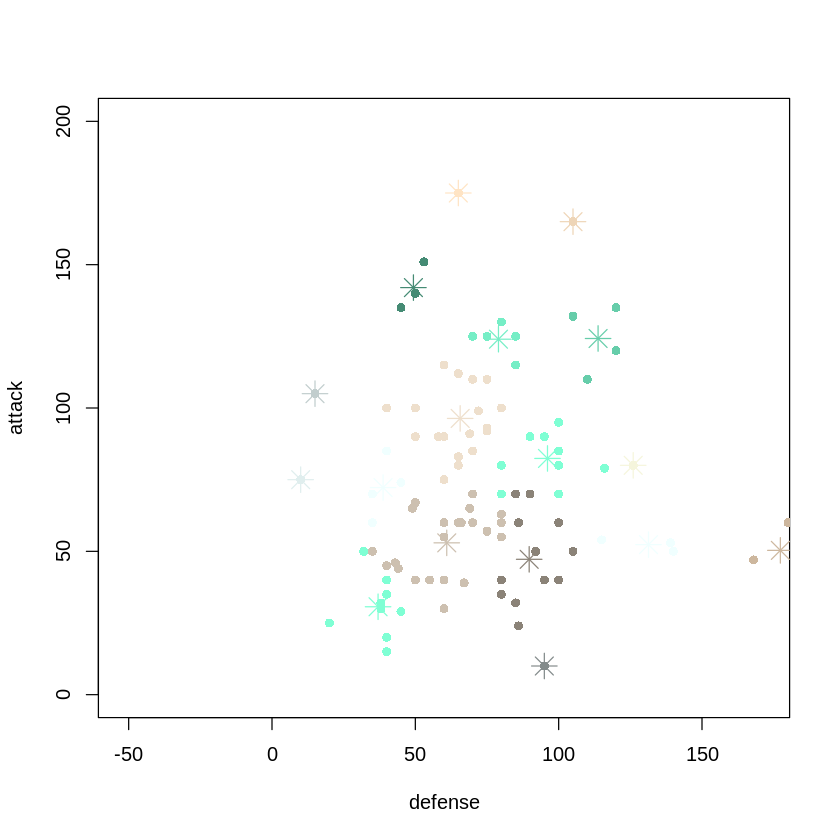

In [4]:
arr <- forel(some_list, 30)

plot_colors <- colors()[5:50]




for (i in 1:length(arr[[1]]))
{
  
  defense <- list()
  attack <- list()
  for (j in 1:length(arr[[1]][[i]]))
  {
    
    defense <- append(defense, arr[[1]][[i]][[j]][1])
    attack <- append(attack, arr[[1]][[i]][[j]][2])
    
  }
  if (i == 1)
  {
    plot(defense, attack, col=plot_colors[i], pch=16, asp=1, cex=1, ylim=c(0,200))

   
  }
  else
  {
    points(defense, attack, col=plot_colors[i], pch=16, asp=1, cex=1)
  }
}


for (i in 1:length(arr[[2]]))
{
  points(arr[[2]][[i]][1], arr[[2]][[i]][2], col=plot_colors[i], pch=8, asp=1, cex=2)
  
}

Сравнивая метод поиска сгущений с методами из пр. работы №6 можно сказать, что данный алгоритм уже не зависит от выбора количества кластеров. Алгоритм получает то количество кластеров, которое уже зависит от радиуса, поданного на вход алгоритма.

**Выводы**
В практичесой работе было произведено разбиение исходного множества объектов на конечное число подмножеств с использованием метода поиска сгущений. В зависимости от выбора радиуса R, мы будем получать разное количестов кластеров, что отличает FOREL от метода k-средних, так как в k-means приходилось вручную выставлять количество кластеров(даже может быть и не оптимальное).